In [63]:
from collections import defaultdict
from pathlib import Path 
import numpy as np 

import matplotlib.pyplot as plt
from PIL import Image

DIR_SAVE = Path("plots-fcgr-masks-clip90"); DIR_SAVE.mkdir(exist_ok=True, parents=True)

DIR_8MER=Path("../output-fcgr-8mer/fcgr")
DIR_MASK=Path("../output-fcgr-masks/fcgr-clip90")

Load all path to figures by sample id

In [64]:
paths_by_sid = defaultdict(dict)
sid_to_batch = defaultdict(str)

for path in list(DIR_8MER.rglob("*jpeg")):

    sid = path.stem
    batch = path.parent.stem
    mask = path.parent.parent.stem.replace("fcgr-mask","")

    paths_by_sid[sid].update({mask: path})
    sid_to_batch[sid] = batch

for path in list(DIR_MASK.rglob("*jpeg")):

    sid = path.stem
    batch = path.parent.stem
    mask = path.parent.parent.stem.replace("fcgr-mask","")

    paths_by_sid[sid].update({mask: path})
    sid_to_batch[sid] = batch

In [65]:
sid = list(paths_by_sid.keys())[30]

In [66]:
paths_by_sid[sid]

{'11111111': PosixPath('../output-fcgr-8mer/fcgr/8mer/fcgr-mask11111111/achromobacter_xylosoxidans__01/SAMN04477589.jpeg'),
 '111100011010001': PosixPath('../output-fcgr-masks/fcgr-clip90/8mer/fcgr-mask111100011010001/achromobacter_xylosoxidans__01/SAMN04477589.jpeg'),
 '111100000001111': PosixPath('../output-fcgr-masks/fcgr-clip90/8mer/fcgr-mask111100000001111/achromobacter_xylosoxidans__01/SAMN04477589.jpeg'),
 '111000101010101': PosixPath('../output-fcgr-masks/fcgr-clip90/8mer/fcgr-mask111000101010101/achromobacter_xylosoxidans__01/SAMN04477589.jpeg'),
 '111100011000011': PosixPath('../output-fcgr-masks/fcgr-clip90/8mer/fcgr-mask111100011000011/achromobacter_xylosoxidans__01/SAMN04477589.jpeg')}

Create figure with 8mer FCGR and FCGR from masks

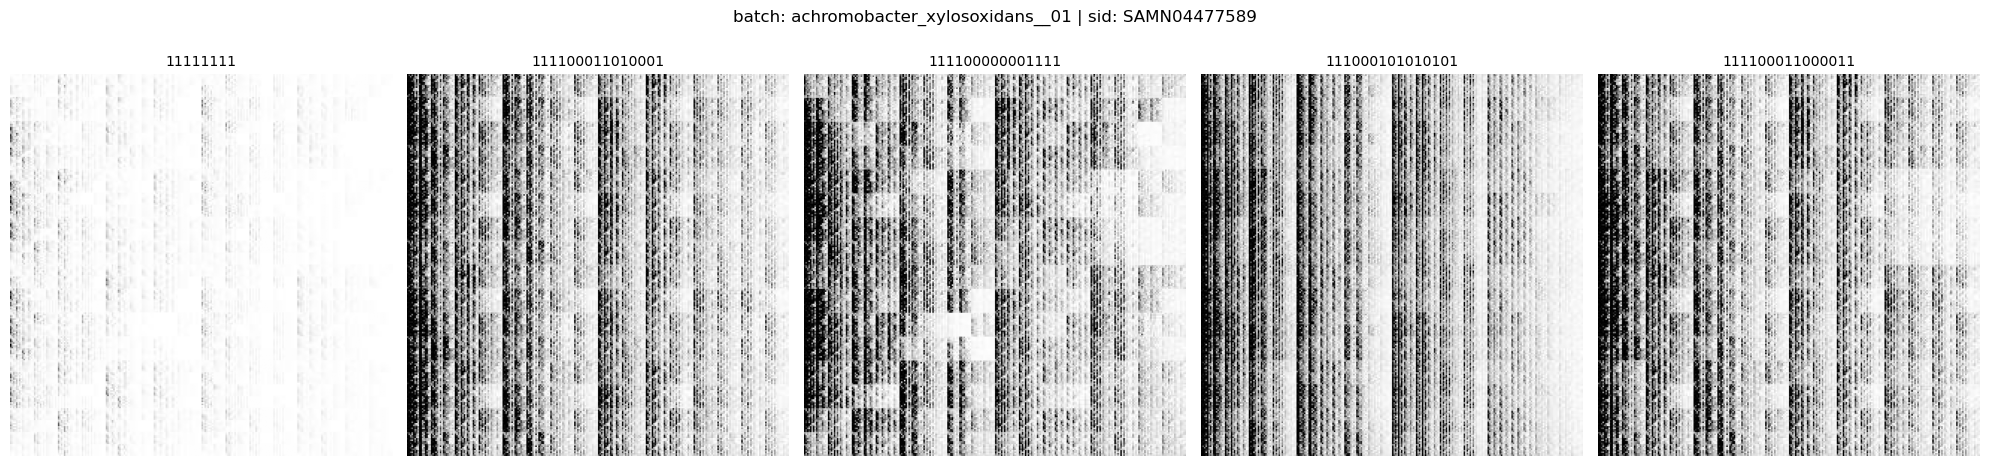

In [67]:
# List your image paths
image_paths = list(paths_by_sid[sid].values())
masks_order = list(paths_by_sid[sid].keys())

# Set up figure
fig, axs = plt.subplots(1, 5, figsize=(20, 5))  # 1 row, 5 columns

for ax, img_path, mask in zip(axs, image_paths, masks_order):

    img = Image.open(img_path,).convert("L")
    ax.imshow(img, cmap="gray")
    ax.axis('off')  # Turn off axes for clean view
    ax.set_title(mask, fontsize=10)  # Optional: filename as title
fig.suptitle(f"batch: {sid_to_batch[sid]} | sid: {sid}")
plt.tight_layout()

path_save = DIR_SAVE.joinpath(f"{img_path.parent.stem}/{img_path.stem + '.pdf'}")
path_save.parent.mkdir(exist_ok=True, parents=True)
plt.savefig(path_save)

plt.show()

In [68]:

for sid in paths_by_sid:

    # List your image paths
    image_paths = list(paths_by_sid[sid].values())
    masks_order = list(paths_by_sid[sid].keys())

    # Set up figure
    fig, axs = plt.subplots(1, 5, figsize=(20, 5))  # 1 row, 5 columns

    for ax, img_path, mask in zip(axs, image_paths, masks_order):

        img = Image.open(img_path,).convert("L")
        ax.imshow(img, cmap="gray")
        ax.axis('off')  # Turn off axes for clean view
        ax.set_title(mask, fontsize=10)  # Optional: filename as title
        
    fig.suptitle(f"batch: {sid_to_batch[sid]} | sid: {sid}")
    plt.tight_layout()
    
    path_save = DIR_SAVE.joinpath(f"{img_path.parent.stem}/{img_path.stem + '.pdf'}")
    path_save.parent.mkdir(exist_ok=True, parents=True)
    plt.savefig(path_save)
    plt.close(fig)
    plt.close('all')

In [69]:
img_path.parent.stem, img_path.stem

('salmonella_enterica__01', 'SAMD00097524')